In [3]:
import numpy as np
import pandas as pd
import json
import os
import matplotlib.pyplot as plt 
from utils.lists import *
from utils.plot_utils import *
from mpl_toolkits.axes_grid1 import make_axes_locatable

/gpfs/gibbs/pi/gerstein/ah2428/conda_envs/r2r/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# ED Fig. 9a TF motif heatmap

In [11]:
atac_enrich = pd.read_csv('/gpfs/gibbs/pi/gerstein/jz435/ShareZhangLab/CommonData/tf_enrichment.csv')
atac_enrich2 = pd.read_csv('/gpfs/gibbs/pi/gerstein/jz435/ShareZhangLab/PTSD/ATAC/data/TF_enrich_N_40.csv')

In [12]:
atac_enrich = atac_enrich.set_index('Unnamed: 0')
atac_enrich.columns = [x.split(' ')[0].split('_')[0] for x in atac_enrich.columns]
atac_enrich.index = ['INH','OPC','END','OLI','MIC','AST','EXC']
atac_enrich = atac_enrich.drop('ENSG00000229544',axis=1)

In [13]:
atac_enrich = atac_enrich[['JUNB', 'JUN', 'FOSL2', 'FOS', 'JUND','SMARCC1',
                           'NHLH2', 'ASCL1', 'TFAP4','TCF12', 'NHLH1', 'LYL1',
                           'ZFX', 'NFIX', 'ZNF148', 'ZBTB7A', 'KLF6', 'KLF15',
                           'SOX9', 'SOX13', 'CTCFL', 'SOX4', 'CTCF',
                           'KLF5', 'SP1', 'KLF4', 'SP2','EBF1',
                           'NFIC', 'EN1', 'GBX2','GBX1',
                           'SPIB', 'SPI1','BCL11A', 'BCL11B', 'SPIC', 'ELF5']]

atac_enrich = atac_enrich.reindex(['EXC','INH','OPC','OLI','END','AST','MIC'])
atac_enrich2.columns = [x.split(' ')[0].split('_')[0] for x in atac_enrich2.columns]
atac_enrich2.index = ['EXC', 'AST', 'MIC', 'INH', 'OLI', 'END', 'OPC']
atac_enrich2 = atac_enrich2.reindex(['EXC','INH','OPC','OLI','END','AST','MIC'])
egr2 = atac_enrich2[['EGR2']]
msx2 = atac_enrich2[['MSX2']]
atac_enrich.insert(loc=6,column='EGR2',value=egr2['EGR2'].values)
atac_enrich.insert(loc=32,column='MSX2',value=msx2['MSX2'].values)

In [14]:
minColor = .8
maxColor = 0
blue = truncate_colormap(plt.get_cmap("Blues_r"), minColor, maxColor)

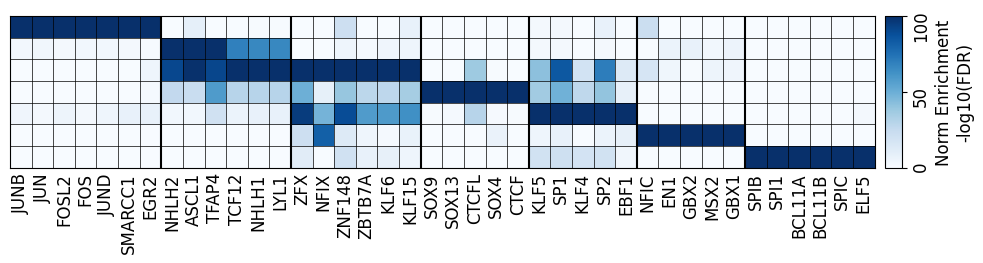

In [15]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

plt.rcParams['font.size'] = '12'
fig, ax = plt.subplots(1,1, figsize=(10,10), sharey=True)

enrich = atac_enrich
img = ax.imshow(np.array(enrich),cmap='Blues')

x_labels = enrich.columns

ax.set_xticks(np.arange(len(enrich.columns)))
ax.set_xticklabels(x_labels,rotation=90)
ax.set_aspect(aspect=1)
ax.set_xticks(np.arange(-0.5, enrich.shape[1]-1),minor=True)
ax.set_yticks(np.arange(-0.5, enrich.shape[0]-1),minor=True)
ax.grid(which='minor', color='k', linewidth=0.5)
ax.grid(which='major',linewidth=0)
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.yaxis.set_ticklabels([])

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.1)
cb = plt.colorbar(img, cax=cax)
cb.ax.set_ylabel('Norm Enrichment\n-log10(FDR)',fontsize=12)
cb.set_ticks([0,50,100])
cb.ax.tick_params(rotation=90)

for g in [7,13,19,24,29,34]:
    ax.axvline(x=g-0.5,color='k')

celltypes = ['EXN','IN','OPC','OLG','END','AST','MG']

fig.tight_layout()

# ED Fig. 9h Top 20 EXN TFs matrix

In [16]:
tf_dict = dict()

d = pd.read_csv(f'/home/ah2428/ShareZhangLab/PTSD/ATAC/data/tf_cre_gene_linkage/EXN_TF_CRE_Gene.csv',sep=',')

for tf in d.TF.unique():
    tf_df = d[d.TF==tf]
    tf_df = tf_df[tf_df.DEG.isin(['UP','DOWN'])]
    deg = tf_df.geneName.unique()
    tf_dict[tf] = deg

In [17]:
tf_dict = sorted(tf_dict.items(), key=lambda x: len(x[1]), reverse=True)

In [18]:
df = pd.DataFrame(tf_dict)

In [19]:
df.columns = ['TF','degs']

In [20]:
arr = np.zeros((20,20))
for i in range(20):
    for j in range(20):
        n = len(list(set(df['degs'][i]) & set(df['degs'][j])))
        arr[i,j] = n

/tmp/ipykernel_539248/383095099.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.set_ticklabels(' ')


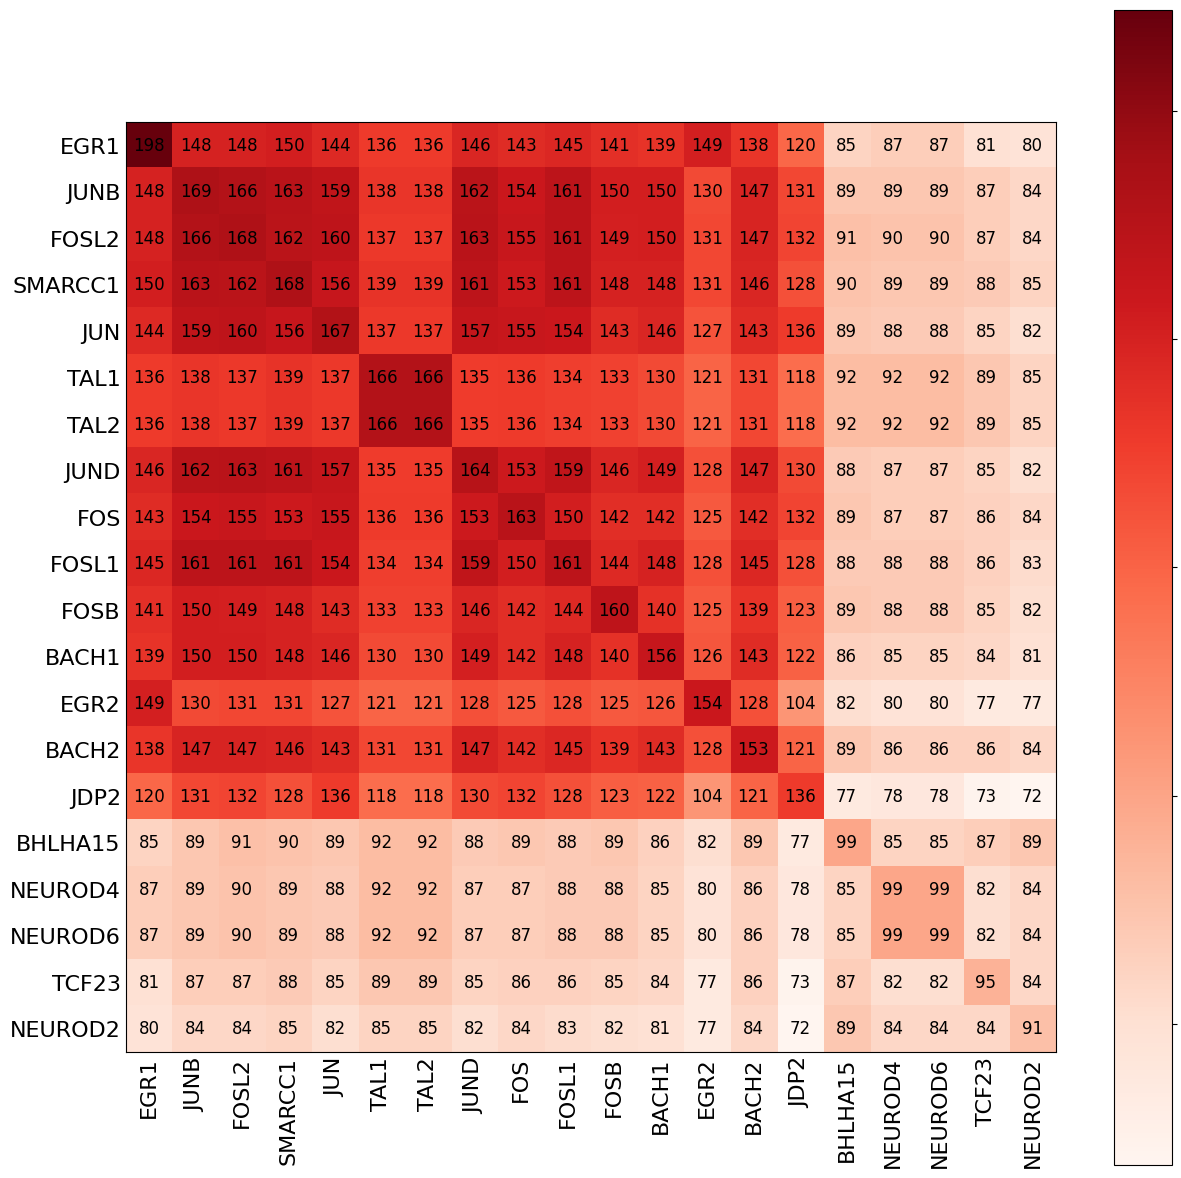

In [23]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

plt.figure(figsize=(15,15))
im = plt.imshow(np.log(arr),cmap='Reds')
for i in range(20):
    for j in range(20):
        plt.text(i,j,int(arr[i,j]),ha="center", va="center",fontsize=12)
plt.tick_params(axis=u'both', which=u'both',length=0)
plt.xticks(np.arange(20),df['TF'],fontsize=16,rotation=90)
plt.yticks(np.arange(20),df['TF'],fontsize=16)
cbar = plt.colorbar(im)
cbar.set_ticklabels(' ')